## Sample usage of our model

In [1]:
from src.models import GRP3Model
import pandas as pd

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
2022-11-04 15:02:55.744798: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 15:02:55.817080: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 15:02:55.820347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory

In [2]:
model = GRP3Model(models_dir="./models")

2022-11-04 15:02:57.424258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 15:02:57.424723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-11-04 15:02:57.424752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2022-11-04 15:02:57.424776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-11-04 15:02:57.424798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could no

Downloading:   0%|          | 0.00/982 [00:00<?, ?B/s]

### Simple usage

In [3]:
test_k = [
    "hello i love u", 
    "hello i hate u",
    "I like to study in the afternoon"
]


# model_class in ["nn", "nn_pos", "tfidf", "bert"] or None to run the full model
print(model.predict(test_k)) # only the full model can output objective label (2)
print(model.predict(test_k, model_class="nn"))
print(model.predict(test_k, model_class="nn_pos"))
print(model.predict(test_k, model_class="tfidf"))
print(model.predict(test_k, model_class="bert"))

[1, 0, 2]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 1]


### Accuracy test for all models

In [4]:
df = pd.read_csv('./dataset/labelled_1k.csv')

Accuracy: 0.764
Precision: 0.767
Recall: 0.764
F1: 0.753


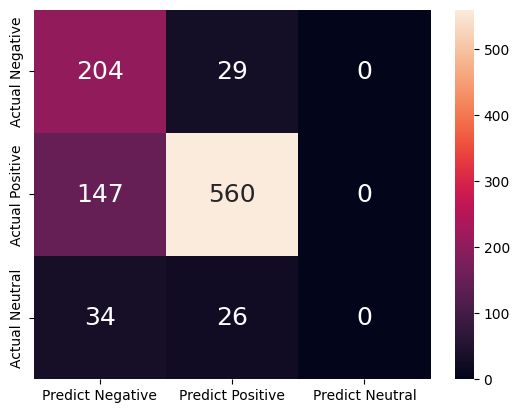

In [5]:
t = list(df["content"])
y = list(df["label"])

model.model_accuracy(text=t, truth_labels=y, model_class="nn")

Accuracy: 0.812
Precision: 0.788
Recall: 0.812
F1: 0.794


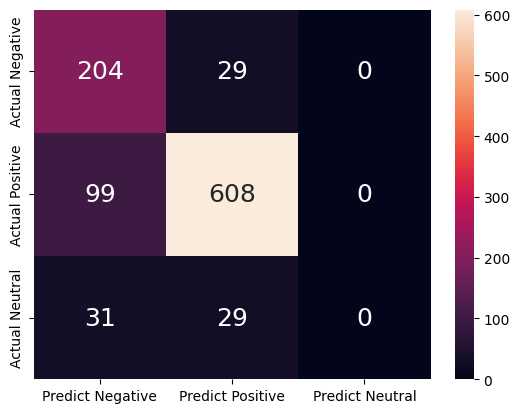

In [6]:
model.model_accuracy(text=t, truth_labels=y, model_class="nn_pos")

Accuracy: 0.827
Precision: 0.797
Recall: 0.827
F1: 0.807


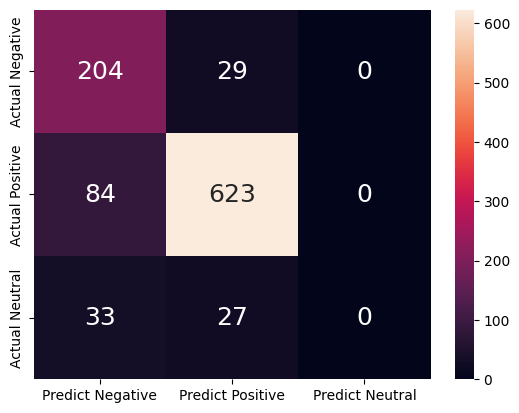

In [7]:
model.model_accuracy(text=t, truth_labels=y, model_class="tfidf")

Accuracy: 0.879
Precision: 0.830
Recall: 0.879
F1: 0.853


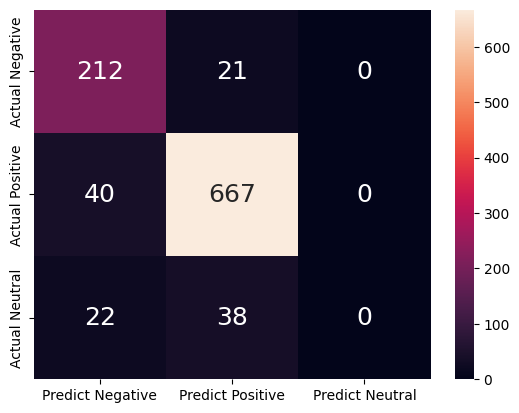

In [8]:
model.model_accuracy(text=t, truth_labels=y, model_class="bert")

Accuracy: 0.872
Precision: 0.860
Recall: 0.872
F1: 0.862


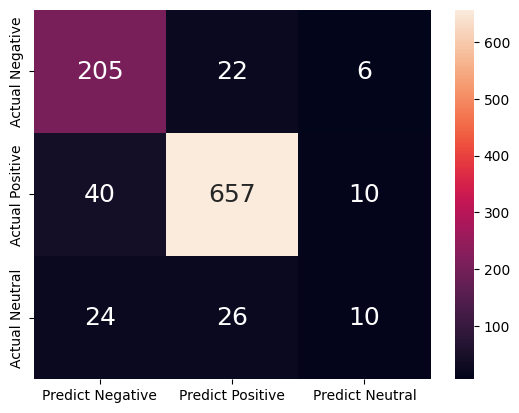

In [9]:
# stacked ensemble
model.model_accuracy(text=t, truth_labels=y, model_class=None)